In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pickle import dump, load

from nn.src.Losses import MSE
from nn.src.Optimizers import SGD
from nn.src.utils import DataLoader, make_simple_sequential

os.chdir("..")

# Loading train data

In [15]:
# df = pd.read_csv("../mio1/regression/square-simple-training.csv")
# df = pd.read_csv("../mio1/regression/steps-small-training.csv")
df = pd.read_csv("../mio1/regression/multimodal-large-training.csv")
X_full = np.asarray(df["x"])
# y_full = np.asarray(df["y"])/50
y_full = np.asarray(df["y"])/200

# Training

0 0.12712309110730316


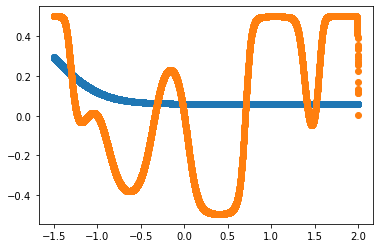

1000 0.0075013687470643665


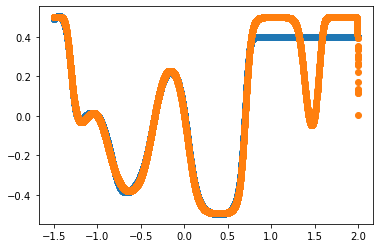

KeyboardInterrupt: 

In [16]:
dataloader = DataLoader(X_full,y_full, batch_size=100)
net = make_simple_sequential((1,5,5,1))
mse = MSE()
optim = SGD(net.layers, lr=0.1)
for epoch in range(10**6):
    for (X,y) in dataloader:
        y_hat = net(X)
        err = mse(y,y_hat)
        gradient = mse.derriv()
        net.backward(gradient)
        optim.step()
    if not epoch % 1000:
        plt.cla()
        print(epoch, err)
        plt.scatter(X_full, net(X_full))
        plt.scatter(X_full, y_full)
        plt.show()

# Saving models

In [62]:
# dump(net, open("square.pkl", "bw"))
# dump(net, open("steps.pkl", "bw"))
# dump(net, open("multimodal.pkl", "bw"))

# Loading models

In [2]:
net = load(open("square.pkl", "br"))
# net = load(open("steps.pkl", "br"))
# net = load(open("multimodal.pkl", "br"))

# Loading test data

In [17]:
# df = pd.read_csv("../mio1/regression/square-simple-test.csv")
# df = pd.read_csv("../mio1/regression/steps-small-test.csv")
df = pd.read_csv("../mio1/regression/multimodal-large-test.csv")
X_full = np.asarray(df["x"])
# y_full = np.asarray(df["y"])/50
y_full = np.asarray(df["y"])/200

25.17823347477139

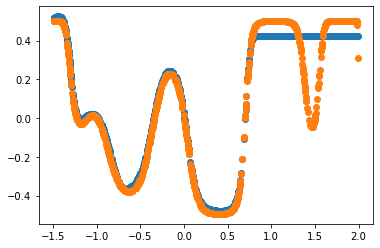

In [18]:
mse = MSE()
plt.scatter(X_full, net(X_full))
plt.scatter(X_full, y_full)
mse(y_full*50, net(X_full)*50)